## Abstract
In this lab we conduct an experiment to test the spectrum of the sun. We will use spectroscopic theory to analyze the data we collect. We collected data from light reflected off of the clouds instead of directly from the sun because our detectors are too sensitive for the sun itself. We found that there were several lines that matched those of hydrogen in the reflected light from the clouds. We conclude that the sun is composed of hydrogen given the spectral signature we found.

## Introduction
For this experiment we are going to use spectroscopic theory to examine the spectrum of the sun and make observations about its composition. The sun is too bright to detect directly, so instead we took data of the clouds outside as a way of detecting reflected light from the sun. Before we can make use of the spectroscopic data we have collected, we must calibrate it against something with a known spectral signature. This is because we do not know how the spectroscopic data we have is distorted by the way it was collected. So, to correct for this, we took data spectroscopic data from a fluorescent lamp and matched the spectral lines in the lamp with the known spectral lines we expect to see given the elements in the lamp. We can then use this calculated distortion amount to find out how much we need to stretch and move the spectroscopic data for the clouds.

Once we have calibrated the spectroscopic data, we can use this calibration to get an accurate spectrum for the clouds. Once we have this then we can look at the spectral lines in the clouds and the wavelengths corresponding to these lines and use that to determine what elements are in the clouds. We can do this by trying to match lines in the elements with lines that we see in our spectrum. We would expect to see hydrogen lines in the cloud data since it is reflected light from the sun and it is expected that we find hydrogen in the sun.

## Theory
For this lab we will be using spectroscopic theory. This is the method of using the amount of light collected at different wavelengths and examining large characteristic changes in these values. For example, we can have both absorption and emmision lines in the spectrum of light from a source. Absorption lines are a result of light from the source being absorbed by something before it can reach our detector. Certain elements can cause absorption lines by absorbing a photon of a given wavelength. In this way we can determine which elements are in a given source based on which absorption lines we see. Similarly, we can see absoption lines as a result of certain chemicals in a source emitting a photon. So, we can use this method as well to determine the chemical composition of an object based on its spectrum.

These emission and absorprtion lines occur as a result of the emission and absorption of electrons in the nucleus of an atom. Emission lines occur when an electron in an atom goes from a higher energy state to a lower energy state. The photon then contains the excess energy, thus determining its wavelength. Absorption lines occur when an electron goes from a lower energy state to a higher energy state by absorbing a photon that has energy equal to the difference in energy levels. In this way the photons corresponding to this wavelength do not appear in the spectrum and therefore form absorption lines.

Hydrogen has well documented absorption lines corresponding to the Balmer series. The Balmer series are absorption lines that are present in the visual spectrum and which we saw strong evidence for in our "solar" spectrum. Presence of these lines indicates a concentration of unionized hydrogen in the solar atmosphere. We know it must be unionized because if it were ionized we would not be able to see absorption lines in these ranges since there would be no electrons in the lower energy states of hydrogen. Similarly, if we were to see emission lines it would imply a large concentration of at least partially ionized elements because the elements must be in an excited state to begin with in order to emit a photon.

#### This first cell is where I imported the data and used linear regression to match the calibration data to the expected emission lines. I then used this to determine the regression parameters to use for our science data.

[[ 171.  183.  179. ...,  201.  187.  190.]
 [ 193.  178.  176. ...,  196.  189.  191.]
 [ 178.  163.  165. ...,  182.  188.  175.]
 ..., 
 [ 157.  155.  149. ...,  274.  245.  270.]
 [ 158.  179.  151. ...,  273.  260.  278.]
 [ 146.  163.  151. ...,  274.  255.  278.]]
[[  294.   286.   290. ...,  4024.  4061.  4067.]
 [  281.   297.   288. ...,  4097.  4247.  4128.]
 [  289.   289.   284. ...,  4223.  4266.  4215.]
 ..., 
 [  316.   349.   353. ...,   345.   353.   344.]
 [  343.   341.   331. ...,   336.   338.   334.]
 [  325.   334.   330. ...,   327.   323.   336.]]
390150
[  4.34096446e-01   4.64341880e+02]


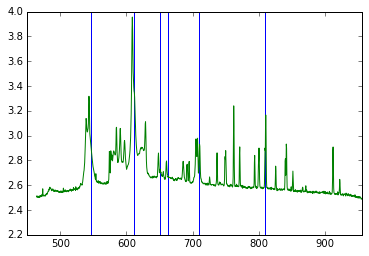

In [1]:
%matplotlib inline
from astropy.io import fits
from __future__ import division
import numpy as np
import scipy as sp
import scipy.misc as scm
import matplotlib.pyplot as plt
import pylab

calibration = fits.getdata("calibration_spectrum_cfl.fits")
sky = fits.getdata("sky_spectrum.fits")

print calibration
print sky
print np.size(calibration)

#Here we are averaging the values of one row for the calibration data and the experimental data
total_1 = np.zeros(1530)
total_2 = np.zeros(1530)
for i in range(10):
    total_1 += calibration[100 + i]
    total_2 += sky[100 + i]
cal_avg = total_1 / 10
sky_avg = total_2 / 10
cal_avg = cal_avg[::-1]
sky_avg = sky_avg[::-1]

wavelength = range(1530)
#Here we are doing a regression of observed lines in our calibration to lines we expect to see
data_1 = [546, 620.6, 650.4, 662.6, 709]
data_2 = [182, 379, 424, 452, 560]
regress = np.polyfit(data_2, data_1, 1)
#Here we are making a vector that gives the adjusted wavelengths 
for i in range(1530):
    wavelength[i] = regress[0]*wavelength[i] + regress[1]

print regress
pylab.xlim([450,956])
plt.axvline(x=546,ymin=0, ymax=1800)
plt.axvline(x=610.8,ymin=0, ymax=1800)
plt.axvline(x=709,ymin=0, ymax=1800)
plt.axvline(x=809,ymin=0, ymax=1800)
plt.axvline(x=650.4,ymin=0, ymax=1800)
plt.axvline(x=662.6,ymin=0, ymax=1800)
plt.plot(wavelength, np.log10(cal_avg), 'g')
plt.show()


#### In this cell I plot the calibrated science image as well as some spectral absorption lines for hydrogen. This shows the hydrogen content of the sun.

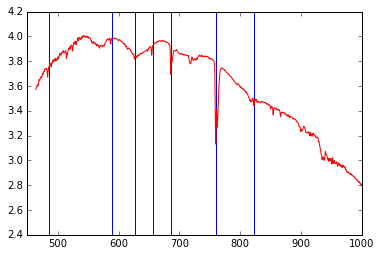

In [2]:
pylab.xlim([450, 1000])
plt.axvline(x=822.696,ymin=0, ymax=1800)
plt.axvline(x=759.370,ymin=0, ymax=1800)
plt.axvline(x=686.719,ymin=0, ymax=1800)
plt.axvline(x=656.281,ymin=0, ymax=1800)
plt.axvline(x=627.661,ymin=0, ymax=1800)
plt.axvline(x=588.995,ymin=0, ymax=1800)
plt.axvline(x=486.134,ymin=0, ymax=1800)
plt.plot(wavelength, np.log10(sky_avg), 'r')
plt.show()

In our spectroscopy of the sky we saw several absorption lines. Some of the more prominent ones are the 656nm H-alpha line, the 759nm $O_2$ line and the 486nm H-beta line. The H-alpha and H-beta lines are each a part of the Balmer series which corresponds to partially ionized hydrogen.

## Summary
In this lab we tested the chemical composition of the sun by examining light reflected from the clouds. To make our data readable, we first needed to convert our two dimensional array data into one dimension by averaging a few horizontal strips in each of the data sets. Once we had readable spectroscopic data we needed to calibrate the data so that we had the right spectrum with the correct wavelength scale. To do this we used emission lines from a fluorescent lamp. We were able to use these lines to match our data with what was theoretically expected. Once we had good agreement with theory for our lab controlled fluorescent lamp, we were able to use this calibration on actual science spectroscopic data.

We the used this calibration to examine the spectroscopy of the clouds. We found that there were few absorption lines of hydrogen that matched very well with what we observed. Additionally, we found many oxygen lines, however, this is most likely a result of examining clouds in order to determine the spectrum of the sun. Since clouds are mostly water, we can expect to find a large amount of neutral oxygen in the spectrum of the clouds. The large detection of partially ionized hydrogen, however, cannot be explained by the composition of the clouds and must therefore be a property of the composition of the sun. This shows that the sun does indeed contain hydrogen. 

## Conclusion
From this experiment we found a good calibration for the telescope data we collected here. We also found out about the composition of the sun by using this calibration to examine the sun's spectroscopy. We can conclude that the sun does indeed contain partially ionized hydrogen because we saw these lines of hydrogen in the sun's spectrum. The results of this lab also allow us to conclude that spectral lines do not always appear exactly how you would expect them to and not all of the lines for a given element will appear every time in the spectrum. Once we realized that not every line would be present and not every line would need to be accounted for, it because easier to get a general idea of what the lines we actually were seeing corresponded to and how to calibrate the data accordingly or determine the composition of the spectrum in question.